This employee dataset has a number of features.  Can we accurately predict if an employee is likely to leave or not based on these features?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('employees.csv')

df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


#### EDA

<AxesSubplot: xlabel='Education'>

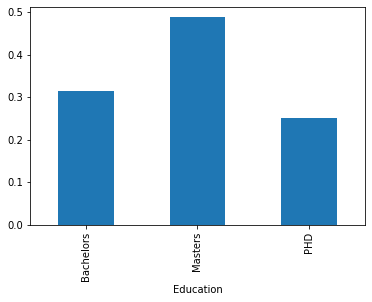

In [4]:
#Which education level leaves the most?
df.groupby('Education')['LeaveOrNot'].mean().plot.bar()

<AxesSubplot: xlabel='PaymentTier'>

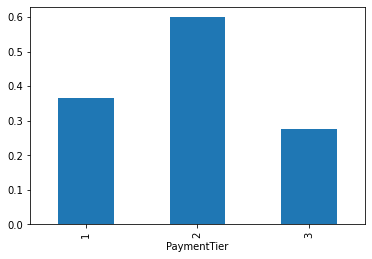

In [5]:
#Which pay tier leaves the most?
df.groupby('PaymentTier')['LeaveOrNot'].mean().plot.bar()

<AxesSubplot: xlabel='Gender'>

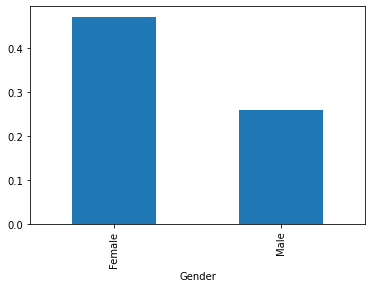

In [6]:
#Which genger leaves the most?
df.groupby('Gender')['LeaveOrNot'].mean().plot.bar()

<AxesSubplot: xlabel='Age'>

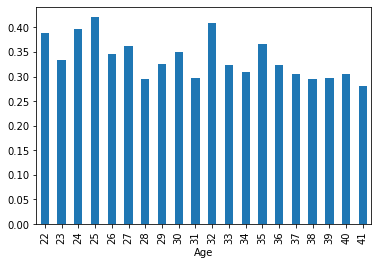

In [7]:
#Which age leaves the most?
df.groupby('Age')['LeaveOrNot'].mean().plot.bar()

<AxesSubplot: >

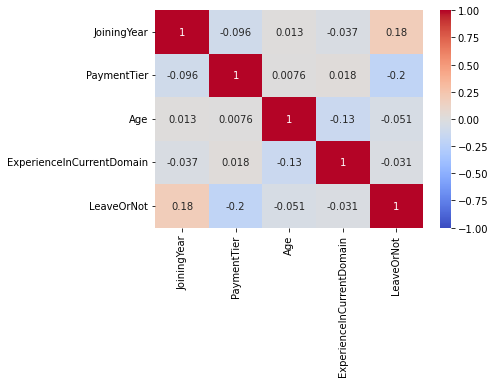

In [8]:
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap='coolwarm')

<AxesSubplot: xlabel='Education', ylabel='count'>

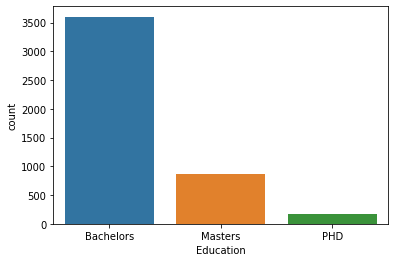

In [9]:
sns.countplot(df, x='Education')

In [10]:
df['JoiningYear'].value_counts()

2017    1108
2015     781
2014     699
2013     669
2016     525
2012     504
2018     367
Name: JoiningYear, dtype: int64

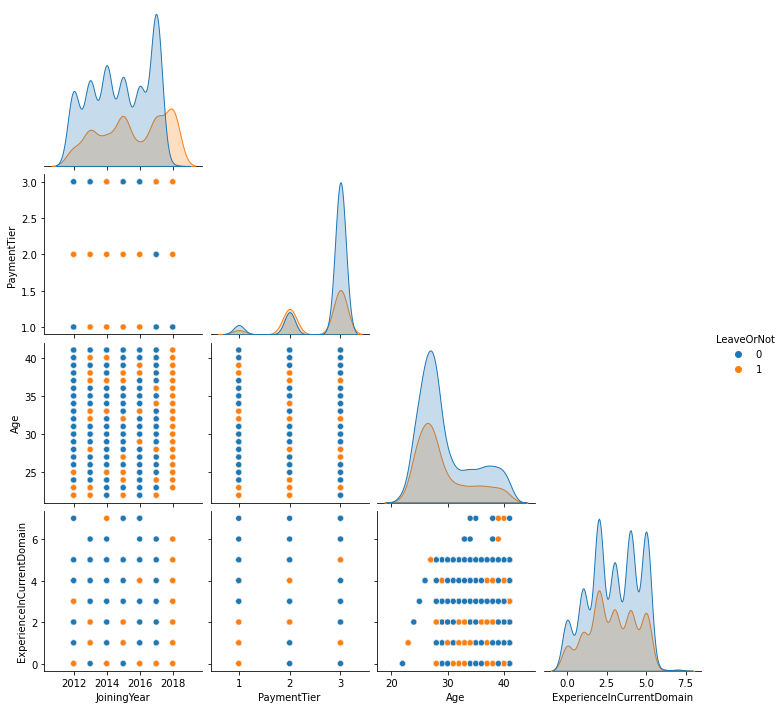

In [11]:
sns.pairplot(df, corner=True, hue='LeaveOrNot')

So far a few things stand out.  
<li>A higher percentage of women are leaving than men</li>
<li>Employees in payment tier 2 leave at a higher rate than pay tiers 1 or 3</li>
<li>Those with Masters degrees leave at a higher rate than those with other types of degrees</li>
<li>Most employees have bachelors degrees</li>
<li>More younger employees are leaving than older employees</li>

In [12]:
#dummy variables
#train test split
#try out various models
#evaluate model performance
#conclusions

In [13]:
df_dumb = pd.get_dummies(df)

In [14]:
df_dumb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   JoiningYear                4653 non-null   int64
 1   PaymentTier                4653 non-null   int64
 2   Age                        4653 non-null   int64
 3   ExperienceInCurrentDomain  4653 non-null   int64
 4   LeaveOrNot                 4653 non-null   int64
 5   Education_Bachelors        4653 non-null   uint8
 6   Education_Masters          4653 non-null   uint8
 7   Education_PHD              4653 non-null   uint8
 8   City_Bangalore             4653 non-null   uint8
 9   City_New Delhi             4653 non-null   uint8
 10  City_Pune                  4653 non-null   uint8
 11  Gender_Female              4653 non-null   uint8
 12  Gender_Male                4653 non-null   uint8
 13  EverBenched_No             4653 non-null   uint8
 14  EverBenched_Yes         

In [15]:
X = df_dumb[['JoiningYear', 'PaymentTier', 'Age', 'ExperienceInCurrentDomain',
        'Education_Bachelors', 'Education_Masters',
       'Education_PHD', 'City_Bangalore', 'City_New Delhi', 'City_Pune',
       'Gender_Female', 'Gender_Male', 'EverBenched_No', 'EverBenched_Yes']]
y = df_dumb['LeaveOrNot']

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=37)

In [18]:
log_model = LogisticRegression()

In [19]:
log_model.fit(X_train, y_train)

LogisticRegression()

In [20]:
log_model.coef_

array([[ 0.00094655, -0.43647326, -0.02657576, -0.05674289, -0.34037203,
         0.43682691, -0.0989445 , -0.12142993, -0.52630146,  0.64524177,
         0.44626664, -0.44875626, -0.26468751,  0.26219788]])

In [21]:
len(X.columns)

14

In [28]:
from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve,plot_roc_curve

In [23]:
y_pred = log_model.predict(X_test)

In [24]:
accuracy_score(y_test, y_pred)

0.7250859106529209

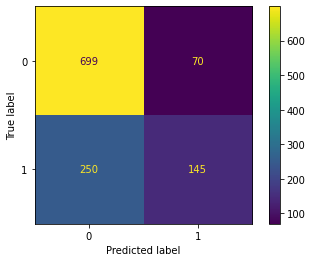

In [25]:
plot_confusion_matrix(log_model, X_test, y_test)

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.91      0.81       769
           1       0.67      0.37      0.48       395

    accuracy                           0.73      1164
   macro avg       0.71      0.64      0.64      1164
weighted avg       0.72      0.73      0.70      1164



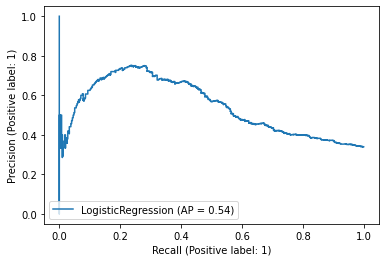

In [29]:
plot_precision_recall_curve(log_model,X_test,y_test)

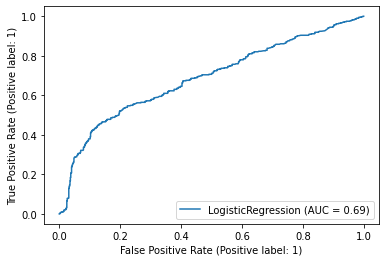

In [30]:
plot_roc_curve(log_model,X_test,y_test)